#### Importing necessary libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Libraries imported.


#### Importing the basic cleaned data
Property prices of Mumbai City source:https://www.99acres.com/property-rates-and-price-trends-in-mumbai

In [5]:
pp_1=pd.read_csv("https://raw.githubusercontent.com/dibyendutapadar/mumbai_city_analysis/master/mumbai_property_price.csv")
pp_1[['Locality Name','buy_rate_avg','Rent_1B_avg','Rent_2B_avg','Rent_3B_avg']].dropna().head(10)

,Locality Name,buy_rate_avg,Rent_1B_avg,Rent_2B_avg,Rent_3B_avg
0,4 Bunglows,19826.5,27625.0,45900.0,56767.5
1,Aarey Milk Colony,7543.5,18417.5,22277.0,26614.5
6,Airoli,10561.5,14259.0,22567.5,32742.0
10,Ambedkar Nagar,16235.0,25239.5,38675.0,56104.0
21,Andheri (East),16809.0,25478.5,39634.5,54910.0
22,Andheri (West),21058.5,25712.5,41536.0,66139.0
26,Asha Nagar,16171.5,18025.5,24593.5,32961.5
29,Azad Nagar,17871.5,24420.0,40350.0,58378.0
36,Bandra (West),37400.0,49608.0,79957.5,151512.5
38,Belapur,9860.0,11465.0,24952.0,43741.0


### Assigning Pincodes to each locality

In [13]:
url="https://nominatim.openstreetmap.org/search/Andheri%20Mumbai?format=json&addressdetails=1&limit=1&polygon_svg=1"
result=requests.get(url).json()
result[0]['lat']

'19.1203713'

In [42]:
url="https://nominatim.openstreetmap.org/search/{}%20{}?format=json&addressdetails=1&limit=1&polygon_svg=1".format("4 Bungalows","Mumbai")
result=requests.get(url).json()
pp_1['Longitude']=None
pp_1.head()

From cffi callback <function _verify_callback at 0x000002C3EB01A9D8>:
Traceback (most recent call last):
  File "C:\Users\23165948\AppData\Local\Continuum\anaconda3\lib\site-packages\OpenSSL\SSL.py", line 306, in wrapper
    @wraps(callback)
KeyboardInterrupt


SSLError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search/4%20Bungalows%20Mumbai?format=json&addressdetails=1&limit=1&polygon_svg=1 (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

In [51]:

for index, row in pp_1.iterrows():

    locality=row['Locality Name']

#initialize your variable to None 


#loop until you get the coordinates

    #while(lat_lng_coords is None):
    url="https://nominatim.openstreetmap.org/search/{}%20{}?format=json&addressdetails=1&limit=1&polygon_svg=1".format(locality,"Mumbai")
    result=requests.get(url).json()
    if result!=[]:
        pp_1.loc[index,'Latitude']=result[0]['lat']
        pp_1.loc[index,'Longitude']=result[0]['lon']

    else:
        pp_1.loc[index,'Latitude']=None
        pp_1.loc[index,'Longitude']=None

        
#Assign Latitude and longitude row['Latitude']= lat_lng_coords[0] row['Longitude'] = lat_lng_coords[1]


In [52]:
pp_1.head()

,Locality Name,buy_rate,buy_rate_trim,buy_rate_lower,buy_rate_higher,buy_rate_avg,Buy Rates Q/Q,Rent_1B,Rent_1B_trim,Rent_1B_Lower,Rent_1B_Upper,Rent_1B_avg,Rent_1B_persqf,Rent_2B,Rent_2B_trim,Rent_2B_Lower,Rent_2B_Upper,Rent_2B_avg,Rent_2B_persqf,Rent_3B,Rent_3B_trim,Rent_3B_Lower,Rent_3B_Upper,Rent_3B_avg,Rent_3B_persqf,Latitude,Longitude
0,4 Bunglows,"Rs.18,828 - 20,825/sq. ft.","18,828 - 20,825",18828.0,20825.0,19826.5,-1.48%,"Rs.24,225 - 31,025","24,225 - 31,025",24225.0,31025.0,27625.0,139%,"Rs.43,350 - 48,450","43,350 - 48,450",43350.0,48450.0,45900.0,232%,"Rs.53,780 - 59,755","53,780 - 59,755",53780.0,59755.0,56767.5,286%,None,None
1,Aarey Milk Colony,"Rs.7,225 - 7,862/sq. ft.","7,225 - 7,862",7225.0,7862.0,7543.5,4.71%,"Rs.16,371 - 20,464","16,371 - 20,464",16371.0,20464.0,18417.5,244%,"Rs.21,216 - 23,338","21,216 - 23,338",21216.0,23338.0,22277.0,295%,"Rs.23,899 - 29,330","23,899 - 29,330",23899.0,29330.0,26614.5,353%,19.1561292,72.8707223
2,Abhyudaya Nagar,"Rs.26,605 - 28,858/sq. ft.","26,605 - 28,858",26605.0,28858.0,27731.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rs.63,954 - 68,395","63,954 - 68,395",63954.0,68395.0,66174.5,239%,NaN,NaN,NaN,NaN,NaN,NaN,18.9904774,72.8440570930591
3,Adaigaon,"Rs.4,462 - 4,802/sq. ft.","4,462 - 4,802",4462.0,4802.0,4632.0,7.92%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,Adharwadi,"Rs.4,675 - 5,398/sq. ft.","4,675 - 5,398",4675.0,5398.0,5036.5,-7.26%,"Rs.5,142 - 6,078","5,142 - 6,078",5142.0,6078.0,5610.0,111%,"Rs.7,268 - 8,882","7,268 - 8,882",7268.0,8882.0,8075.0,160%,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [53]:
pp_1.to_csv("pp_latlong.csv")

In [70]:
## importing from already saved csv file to save time and repeated API calls
# Dropping the locality for which the coordinates are not being able to be fetched

In [121]:
city_data=pd.read_csv("https://raw.githubusercontent.com/dibyendutapadar/mumbai_city_analysis/master/pp_latlong.csv")

In [126]:
city_data[['Locality Name','Latitude','Longitude']].dropna().drop_duplicates().head(10)

,Locality Name,Latitude,Longitude
1,Aarey Milk Colony,19.156129,72.870722
2,Abhyudaya Nagar,18.990477,72.844057
6,Airoli,19.158515,72.999402
8,Alika Nagar,19.198397,72.874267
10,Ambedkar Nagar,19.070822,72.828865
16,Amboli,19.132010,72.849864
17,Amrut Nagar,19.100845,72.911820
18,Anand Nagar,18.966523,72.811888
21,Andheri (East),19.115883,72.854202
22,Andheri (West),19.117249,72.833968


In [ ]:
city_data.drop(['index'],axis=1,inplace=True)
city_data.tail()
city_data['Latitude'].dropna(inplace=True)
city_data['Longitude'].dropna(inplace=True)
print(city_data.shape)
city_data.head()

### Plotting data to check how much extent is covered by the extracted lat longs

In [ ]:
##setting the mean latitude and longitude for the area under consideration

In [7]:
latitude =city_data.Latitude.mean()
longitude =city_data.Longitude.mean()
print(latitude,longitude)

19.082797148663104 72.94383357662225


In [4]:
# Plotting coordinates to check to what extent the area is covered by sample space

In [10]:

venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around center



# add coordinates to the map as blue circle markers
for lat, lng, label in zip(city_data.Latitude, city_data.Longitude, city_data['Locality Name']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.7
        ).add_to(venues_map)

# saving map to html
venues_map.save(outfile='plotcheck.html')

In [ ]:
# creating easy to read labels for each coordinates with Locality rates and average property price

In [84]:
city_pp=city_data[['Locality Name','buy_rate_avg','Latitude','Longitude']]
city_pp['price_label']=city_pp['Locality Name']+" -Rs."+city_pp['buy_rate_avg'].astype(str)+"/sq.ft"
city_pp.dropna(inplace=True)
city_pp.head()

C:\Users\23165948\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\23165948\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality Name,buy_rate_avg,Latitude,Longitude,price_label
1,Aarey Milk Colony,7543.5,19.156129,72.870722,Aarey Milk Colony -Rs.7543.5/sq.ft
2,Abhyudaya Nagar,27731.5,18.990477,72.844057,Abhyudaya Nagar -Rs.27731.5/sq.ft
6,Airoli,10561.5,19.158515,72.999402,Airoli -Rs.10561.5/sq.ft
8,Alika Nagar,14450.0,19.198397,72.874267,Alika Nagar -Rs.14450.0/sq.ft
10,Ambedkar Nagar,16235.0,19.070822,72.828865,Ambedkar Nagar -Rs.16235.0/sq.ft


In [ ]:
## grouping the data by latitude and longitude if in case there is some repeatation in the data

In [12]:
city_plot=city_pp[['Latitude','Longitude','buy_rate_avg']].groupby(['Latitude','Longitude'],as_index=False).mean()
city_plot.head()

,Latitude,Longitude,buy_rate_avg
0,17.490622,78.406829,7628.5
1,18.787747,73.343819,3379.0
2,18.799688,73.286047,7416.5
3,18.897882,73.180361,3421.0
4,18.913641,72.820930,52233.0


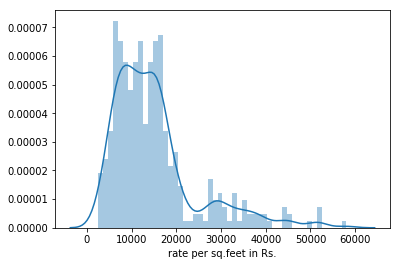

In [22]:
## Checking the distribution of average price per square feet on a histogram

x=sns.distplot(city_pp['buy_rate_avg'], label='rate per square feet', bins=50, norm_hist=True, axlabel='rate per sq.feet in Rs.')

### clustering by price

In [ ]:
##Generating Heatmap based on the price

In [40]:
from folium.plugins import HeatMap

max_amount = float(city_plot['buy_rate_avg'].max())

hmap = folium.Map(location=[latitude, longitude], zoom_start=11,)

hm_wide = HeatMap( list(zip(city_plot.Latitude, city_plot.Longitude, city_plot['buy_rate_avg'])),
                   min_opacity=0.5,
                   max_val=45000,
                   radius=10, 
                   blur=10,
                   max_zoom=5, 
                 )

hmap.add_child(hm_wide)
for lat, lng, label in zip(city_pp.Latitude, city_pp.Longitude, city_pp['price_label']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=0.2,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.01
        ).add_to(hmap)
hmap.save(outfile= "price_heat_map.html")

In [ ]:
## Binning the property prices into bins so that they can be mapped as a cluster on geo-map

In [77]:
bins= np.linspace(min(city_pp["buy_rate_avg"]),max(city_pp["buy_rate_avg"]),10)
group_names=range(1,10)
city_pp['price_binned']=pd.cut(city_pp['buy_rate_avg'],bins,labels=group_names,include_lowest=True)

C:\Users\23165948\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
city_pp.sort_values('price_binned',inplace=True)
city_pp.head()

C:\Users\23165948\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Locality Name,buy_rate_avg,Latitude,Longitude,price_label,price_binned
1,Aarey Milk Colony,7543.5,19.156129,72.870722,Aarey Milk Colony -Rs.7543.5/sq.ft,1
172,Kalyan (West),5695.0,19.137892,72.810668,Kalyan (West) -Rs.5695.0/sq.ft,1
171,Kalyan (East),5142.5,19.137892,72.810668,Kalyan (East) -Rs.5142.5/sq.ft,1
168,Kalu Nagar,5610.0,19.006276,72.819125,Kalu Nagar -Rs.5610.0/sq.ft,1
165,Kalamboli,6353.5,19.035831,73.103480,Kalamboli -Rs.6353.5/sq.ft,1


In [ ]:
## Genrating the map with the clustered prices color coded.

In [86]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11, tiles='cartodbpositron')

# set color scheme for the clusters
x = np.arange(10)
ys = [i + x + (i*x)**2 for i in range(10)]
colors_array = cm.Reds(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, tag, cluster in zip(city_pp['Latitude'], city_pp['Longitude'], city_pp['price_label'],city_pp['price_binned']):
    label = folium.Popup(str(tag), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        blur=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)

map_clusters.save(outfile="price_cluster_map.html")

# Using four square apis to get venue details

In [85]:
CLIENT_ID="RFBWD0MXEMM3ESEHAPAJMAPGOA4GF5NBWA15BU1CYSRLLWSZ"
CLIENT_SECRET="M3LQZF1E0YG0EQJ0IUMDUFDQSGZN0RHNFXDH335O44CYPAIR"
VERSION='20180604'
radius=1000
LIMIT=100



url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=RFBWD0MXEMM3ESEHAPAJMAPGOA4GF5NBWA15BU1CYSRLLWSZ&client_secret=M3LQZF1E0YG0EQJ0IUMDUFDQSGZN0RHNFXDH335O44CYPAIR&ll=19.082797148663104,72.94383357662225&v=20180604&radius=1000&limit=100'

In [27]:
results = requests.get(url).json()

In [28]:
results

{'meta': {'code': 200, 'requestId': '5c880409dd57977bd5943e32'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Mumbai',
  'headerFullLocation': 'Mumbai',
  'headerLocationGranularity': 'city',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 19.091797157663112,
    'lng': 72.95333913968412},
   'sw': {'lat': 19.073797139663096, 'lng': 72.93432801356039}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f6edf60e4b0a4e210f38249',
       'name': 'Pizzas etc.',
       'location': {'lat': 19.086177825927734,
        'lng': 72.93568420410156,
        'labeledLatLngs': [{'label': 'display',
          'lat': 19.086177825927734,
          'lng':

In [30]:
items=results['response']['groups'][0]['items']
items

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4f6edf60e4b0a4e210f38249',
   'name': 'Pizzas etc.',
   'location': {'lat': 19.086177825927734,
    'lng': 72.93568420410156,
    'labeledLatLngs': [{'label': 'display',
      'lat': 19.086177825927734,
      'lng': 72.93568420410156}],
    'distance': 936,
    'cc': 'IN',
    'country': 'India',
    'formattedAddress': ['India']},
   'categories': [{'id': '4bf58dd8d48988d1ca941735',
     'name': 'Pizza Place',
     'pluralName': 'Pizza Places',
     'shortName': 'Pizza',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-4f6edf60e4b0a4e210f38249-0'}]

In [31]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [105]:
city_call=city_pp[['Locality Name','Latitude','Longitude']].drop_duplicates()
city_call.shape

(367, 3)

In [93]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        if results!=[]:
        # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [106]:
Mumbai_venues = getNearbyVenues(names=city_call['Locality Name'],
                                   latitudes=city_call['Latitude'],
                                   longitudes=city_call['Longitude']
                                  )

Aarey Milk Colony
Abhyudaya Nagar
Airoli
Alika Nagar
Ambedkar Nagar
Amboli
Amrut Nagar
Anand Nagar
Andheri (East)
Andheri (West)
Asangaon
Asha Nagar
Azad Nagar
Babhai
Bandra (East)
Bandra (West)
Bandra Kurla Complex
Belapur
Belpada
Bhagat Colony
Bhakti Park
Bhandup (East)
Bhandup (West)
Boisar
Borivali (East)
Borivali (West)
Breach Candy
Byculla
Byculla East
Byculla West
Chakala
Chanakya Nagar
Chandivali
Charkop
Chembur
Chembur (East)
Chembur (West)
Chincholi Bunder
Churchgate
Colaba
Cuffe Parade
Dadar
Dadar (East)
Dadar (West)
Dahanukar Wadi
Dahisar
Dahisar (East)
Dahisar (West)
Dattapada
Daulat Nagar
Deonar
Devipada
Dina Bama Estate
Dindoshi
Diva Gaon
DN Nagar
Dongarpada
Eksar
Ekta Nagar
Evershine Nagar
Film City Road
G B Road
Gamdevi
Gandhi Nagar
Ganesh Nagar
Garodia Nagar
Geeta Nagar
Ghansoli
Ghatkopar (East)
Ghatkopar West
Girgaon
Gokuldham
Gorai
Goregaon (East)
Goregaon (West)
Govandi
Hanuman Nagar
Hemu Colony
Hindu Colony
Hiranandani Gardens - Powai
I C Colony
Irani Wadi
J B Nag

In [109]:
Mumbai_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aarey Milk Colony,19.156129,72.870722,The Westin Mumbai Garden City,19.172654,72.860518,Hotel
1,Aarey Milk Colony,19.156129,72.870722,PVR Cinemas,19.174016,72.860485,Multiplex
2,Aarey Milk Colony,19.156129,72.870722,Film City,19.160960,72.886177,Event Space
3,Aarey Milk Colony,19.156129,72.870722,Starbucks,19.174177,72.860350,Coffee Shop
4,Aarey Milk Colony,19.156129,72.870722,British Brewing Company (BBC),19.174186,72.860504,Brewery


In [110]:
Mumbai_venues.to_csv(r"Mumbai_venues.csv")

# Stored the venue details on git to do away with the need of calling the apis over and over again

In [111]:
city_venues=pd.read_csv("https://raw.githubusercontent.com/dibyendutapadar/mumbai_city_analysis/master/Mumbai_venues.csv")
city_venues.head()

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Aarey Milk Colony,19.156129,72.870722,The Westin Mumbai Garden City,19.172654,72.860518,Hotel
1,1,Aarey Milk Colony,19.156129,72.870722,PVR Cinemas,19.174016,72.860485,Multiplex
2,2,Aarey Milk Colony,19.156129,72.870722,Film City,19.160960,72.886177,Event Space
3,3,Aarey Milk Colony,19.156129,72.870722,Starbucks,19.174177,72.860350,Coffee Shop
4,4,Aarey Milk Colony,19.156129,72.870722,British Brewing Company (BBC),19.174186,72.860504,Brewery


In [112]:
venue_count= city_venues[['Neighborhood','Venue']].groupby('Neighborhood', as_index=False).count()
venue_count.rename(columns={'Neighborhood':'Locality Name'},inplace=True)
venue_count

,Locality Name,Venue
0,Aarey Milk Colony,59
1,Abhyudaya Nagar,100
2,Airoli,21
3,Alika Nagar,62
4,Ambedkar Nagar,100
5,Amboli,100
6,Amrut Nagar,100
7,Anand Nagar,100
8,Andheri (East),100
9,Andheri (West),100


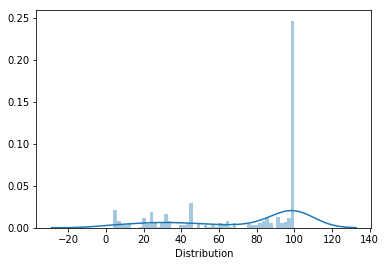

In [113]:
## Checking the distribution of venues

x=sns.distplot(venue_count['Venue'], label='number of venues', bins=50, norm_hist=True, axlabel='Distribution')

In [114]:
venue_plot=pd.merge(venue_count,city_pp,on='Locality Name', how='left')
venue_plot.drop(['price_label'],1,inplace=True)
venue_plot.drop_duplicates(inplace=True)

In [127]:
from folium.plugins import HeatMap

max_amount = float(venue_plot['Venue'].max())

hmap = folium.Map(location=[latitude, longitude], zoom_start=11,)

hm_wide = HeatMap( list(zip(venue_plot.Latitude, venue_plot.Longitude, venue_plot['Venue'])),
                   min_opacity=0.5,
                   max_val=max_amount,
                   radius=7, 
                   blur=10,
                   max_zoom=5, 
                 )

hmap.add_child(hm_wide)
for lat, lng, label in zip(venue_plot.Latitude, venue_plot.Longitude, venue_plot['Locality Name']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=0.2,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.01
        ).add_to(hmap)
hmap.save(outfile= "venue_heat_map.html")